In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv(r"..\datafiles\50_Startupsm.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  49 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           49 non-null     object 
 4   Profit          49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


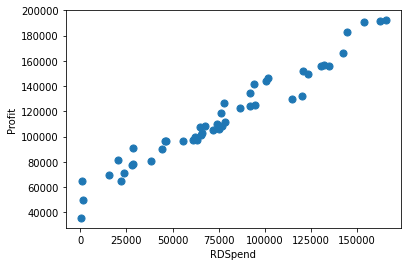

In [54]:
plt.scatter(df['RDSpend'], df['Profit'], s = 50)
plt.xlabel("RDSpend")
plt.ylabel("Profit")
plt.show()

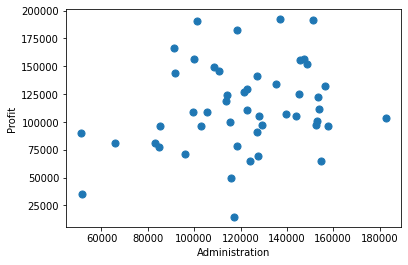

In [55]:
plt.scatter(df['Administration'], df['Profit'], s = 50)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

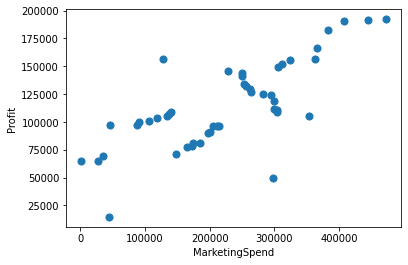

In [56]:
plt.scatter(df['MarketingSpend'], df['Profit'], s = 50)
plt.xlabel("MarketingSpend")
plt.ylabel("Profit")
plt.show()

In [57]:
df.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.269749,0.708253,0.977401
Administration,0.269749,1.000000,-0.076943,0.226442
MarketingSpend,0.708253,-0.076943,1.000000,0.747434
Profit,0.977401,0.226442,0.747434,1.000000


In [58]:
df.head(5)

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
df['State'].value_counts()

New York      17
Florida       16
California    16
Name: State, dtype: int64

In [60]:
df.isna().sum()

RDSpend           1
Administration    0
MarketingSpend    2
State             0
Profit            0
dtype: int64

In [61]:
rd_withoutna = df['RDSpend'].dropna()

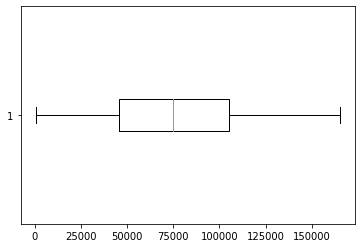

In [62]:
plt.boxplot(rd_withoutna, vert=False);

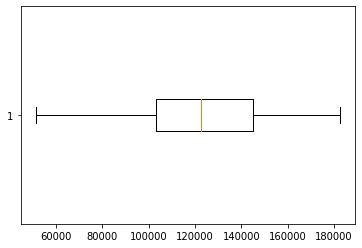

In [63]:
plt.boxplot(df['Administration'], vert=False);

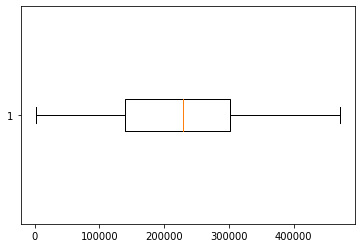

In [64]:
ms_withoutna = df['MarketingSpend'].dropna()
plt.boxplot(ms_withoutna, vert=False);

## Replace NA values with mean

In [65]:

df['RDSpend'].fillna(value=df['RDSpend'].mean(),inplace=True)

df['MarketingSpend'].fillna(value=df['MarketingSpend'].mean(), inplace=True)


## Split Data into X and y

In [66]:
X = df.iloc[:,[0,2]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(49, 2) (49,)


## Split Data into training and testing

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# random_State is a seed value
# you can give any seed value - doesnt matter
# To replicate the results, use the same seed value

In [69]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(39, 2) (10, 2) (39,) (10,)


In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
model.coef_

array([0.69222438, 0.07953232])

In [73]:
model.intercept_

41455.956009724905

## Validate the model

In [74]:
model.score(X_test, y_test)

0.9411438849281002

r2_score approx accuracy
r2_score explains the variation in the data


In [75]:
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score(y_test,y_pred)
#coefficient of determination) regression score function.

0.9411438849281002

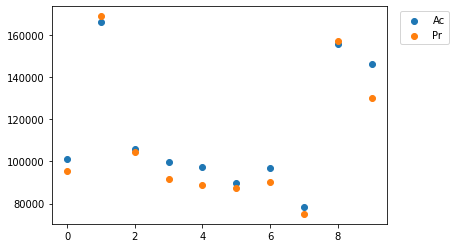

In [78]:
plt.scatter(range(len(y_test)), y_test, label = 'Ac')
plt.scatter(range(len(y_pred)), y_pred, label = 'Pr')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [84]:
# Calculate VIF factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         49 non-null     float64
 1   Administration  49 non-null     float64
 2   MarketingSpend  49 non-null     float64
 3   State           49 non-null     object 
 4   Profit          49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [85]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
origXColumns = df.iloc[:, :-2]
origXColumns.values

array([[165349.2       , 136897.8       , 471784.1       ],
       [162597.7       , 151377.59      , 443898.53      ],
       [153441.51      , 101145.55      , 407934.54      ],
       [144372.41      , 118671.85      , 383199.62      ],
       [142107.34      ,  91391.77      , 366168.42      ],
       [131876.9       ,  99814.71      , 362861.36      ],
       [134615.46      , 147198.87      , 127716.82      ],
       [130298.13      , 145530.06      , 323876.68      ],
       [120542.52      , 148718.95      , 311613.29      ],
       [123334.88      , 108679.17      , 304981.62      ],
       [101913.08      , 110594.11      , 229160.95      ],
       [100671.96      ,  91790.61      , 249744.55      ],
       [ 93863.75      , 127320.38      , 249839.44      ],
       [ 91992.39      , 135495.07      , 252664.93      ],
       [119943.24      , 156547.42      , 256512.92      ],
       [114523.61      , 122616.84      , 261776.23      ],
       [ 78013.11      , 121597.55      

In [82]:
origXColumns.shape[1]

3

In [83]:
vif["VIF Factor"] = [variance_inflation_factor(origXColumns.values, i) for i in range(origXColumns.shape[1])]
vif["features"] = origXColumns.columns
vif.round(1)

,VIF Factor,features
0,8.4,RDSpend
1,4.8,Administration
2,7.8,MarketingSpend


In [87]:
variance_inflation_factor(origXColumns.values, 0)

8.361605271963622